Missing or duplicate data may exist in a data set for a number of different reasons. Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as:
<ul>
    <li>Combining data</li>
    <li>Reindexing data</li>
    <li>Reshaping data</li>
    </ul>
    
Other times, it exists in the original data set for reasons such as:
<ul>
    <li>User input error</li>
    <li>Data storage or conversion issues</li>
    </ul>
    
In the case of missing values, they may also exist in the original data set to purposely indicate that data is unavailable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wh_2015 = pd.read_csv(r'C:\Users\lumum\Documents\Data Projects\working-with-missing-and-duplicate-data\datasets\wh_2015.csv')
wh_2016 = pd.read_csv(r'C:\Users\lumum\Documents\Data Projects\working-with-missing-and-duplicate-data\datasets\wh_2016.csv')
wh_2017 = pd.read_csv(r'C:\Users\lumum\Documents\Data Projects\working-with-missing-and-duplicate-data\datasets\wh_2017.csv')

In [2]:
shape_2015 = wh_2015.shape

In [3]:
shape_2015

(164, 13)

In [4]:
#use the series.isnull() method to identify rows with missing values.
missing = wh_2015['Happiness Score'].isnull()
#series.isnull() returns a boolean same sized object indicating if valeus are NA .NaN, gets mapped to True values
wh_2015[missing]

Country Region  Happiness Rank  Happiness Score  \
158             Belize    NaN             NaN              NaN   
159            Namibia    NaN             NaN              NaN   
160        Puerto Rico    NaN             NaN              NaN   
161            Somalia    NaN             NaN              NaN   
162  Somaliland Region    NaN             NaN              NaN   
163        South Sudan    NaN             NaN              NaN   

     Standard Error  Economy (GDP per Capita)  Family  \
158             NaN                       NaN     NaN   
159             NaN                       NaN     NaN   
160             NaN                       NaN     NaN   
161             NaN                       NaN     NaN   
162             NaN                       NaN     NaN   
163             NaN                       NaN     NaN   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
158                       NaN      NaN                            NaN   
159                       NaN      NaN                            NaN   
160                       NaN      NaN                            NaN   
161                       NaN      NaN                            NaN   
162                       NaN      NaN                            NaN   
163                       NaN      NaN                            NaN   

     Generosity  Dystopia Residual  Year  
158         NaN                NaN  2015  
159         NaN                NaN  2015  
160         NaN                NaN  2015  
161         NaN                NaN  2015  
162         NaN                NaN  2015  
163         NaN                NaN  2015

In [5]:
# when working with bigger data sets, it's easier to get a summary of the missing values as follows:
wh_2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

I will use the following work flow to clean our missing values, starting from checking for errors:

<ol type= "1">
    <li>Check for errors in data cleaning/transformation.</li>
    <li>Use data from additional sources to fill missing values.</li>
    <li>Drop row/column.</li>
    <li>Fill missing values with reasonable estimates computed from the available data.</li>
    </ol>

In [6]:
wh_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [7]:
wh_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [8]:
wh_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [9]:
#changing the column names
wh_2017.columns = wh_2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
#the r'[\(\)]' sets up a regex list of values to be replaced with ''.
wh_2015.columns = wh_2015.columns.str.replace(r'[\(\)]', '').str.upper()

wh_2016.columns = wh_2016.columns.str.replace(r'[\(\)]', '').str.upper()

combined = pd.concat([wh_2015, wh_2016, wh_2017], ignore_index=True)
missing = combined.isnull().sum()

C:\Users\lumum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

We can learn more about where these missing values are located by visualizing them with a <b>heatmap</b>, a graphical representation of our data in which values are represented as colors. 
<br>We'll use the <b>seaborn library</b> to create the heatmap.</br>

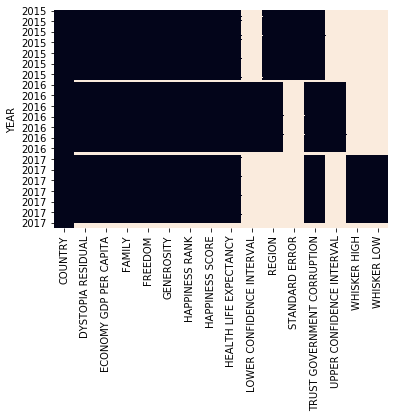

In [11]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

To understand this visualization, imagine we took combined, highlighted missing values in light gray and all other values in black, and then shrunk it so that was could easily view the entire dataframe at once.

We can make the following observations:
<ul>
<li>No values are missing in the COUNTRY column.</li>
<li>There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.</li>
    <li>Some columns only have data populated for one year.</li>
    <li>It looks like the REGION data is missing for the year 2017.</li>
    </ul>

In [12]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()

In [13]:
missing

164

We need <b>REGIONS</b> column in order to do analysis, but 2017 lacks it.

Before we drop or replace any values, let's first see if there's a way we can use other available data to correct the values.
<ol type="1">
<li>Check for errors in data cleaning/transformation.</li>
<li>Use data from additional sources to fill missing values.</li>
<li>Drop row/column.</li>
<li>Fill missing values with reasonable estimates computed from the available data.</li>
</ol>


Recall once more that each year contains the same countries. 
<br>Since the regions are fixed values - the region a country was assigned to in 2015 or 2016 won't change - we should be able to assign the 2015 or 2016 region to the 2017 row.</br>

In [14]:
regions = wh_2015[['COUNTRY','REGION']]

In [15]:
#assign the REGION in the regions dataframe to the corresponding country in combined
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
#drop the original region column with missing values, now named REGION_x
combined = combined.drop('REGION_x', axis = 1)
#Use the DataFrame.isnull() and DataFrame.sum() methods to check for missing values.
missing = combined.isnull().sum()

In [16]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION_y                        18
dtype: int64

##  DataFrame.duplicated()
Check for duplicate values. If no parameters are specified, the method will check for any rows in which all columns have the same values.

Since we should only have one country for each year, we can be a little more thorough by defining rows with ONLY the same country and year as duplicates.

To accomplish this, let's pass a list of the COUNTRY and YEAR column names into the df.duplicated() method:

In [17]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

Empty DataFrame
Columns: [COUNTRY, DYSTOPIA RESIDUAL, ECONOMY GDP PER CAPITA, FAMILY, FREEDOM, GENEROSITY, HAPPINESS RANK, HAPPINESS SCORE, HEALTH LIFE EXPECTANCY, LOWER CONFIDENCE INTERVAL, STANDARD ERROR, TRUST GOVERNMENT CORRUPTION, UPPER CONFIDENCE INTERVAL, WHISKER HIGH, WHISKER LOW, YEAR, REGION_y]
Index: []

Since the dataframe is empty, we can tell that there are no rows with exactly the same country AND year.

In [18]:
#standardize the country column to upper case
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
#Since we should only have one country for each year, we can be a little more thorough 
#by defining rows with ONLY the same country and year as duplicates.
dups = combined.duplicated(['COUNTRY','YEAR'])
print(combined[dups])

               COUNTRY  DYSTOPIA RESIDUAL  ECONOMY GDP PER CAPITA  FAMILY  \
162  SOMALILAND REGION                NaN                     NaN     NaN   
326  SOMALILAND REGION                NaN                     NaN     NaN   
489  SOMALILAND REGION                NaN                     NaN     NaN   

     FREEDOM  GENEROSITY  HAPPINESS RANK  HAPPINESS SCORE  \
162      NaN         NaN             NaN              NaN   
326      NaN         NaN             NaN              NaN   
489      NaN         NaN             NaN              NaN   

     HEALTH LIFE EXPECTANCY  LOWER CONFIDENCE INTERVAL  STANDARD ERROR  \
162                     NaN                        NaN             NaN   
326                     NaN                        NaN             NaN   
489                     NaN                        NaN             NaN   

     TRUST GOVERNMENT CORRUPTION  UPPER CONFIDENCE INTERVAL  WHISKER HIGH  \
162                          NaN                        NaN           Na

## df.drop_duplicates

In [19]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

combined = combined.drop_duplicates(['COUNTRY','YEAR'])

In [20]:
dups = combined.duplicated(['COUNTRY','YEAR'])

In [21]:
print(combined[dups])

Empty DataFrame
Columns: [COUNTRY, DYSTOPIA RESIDUAL, ECONOMY GDP PER CAPITA, FAMILY, FREEDOM, GENEROSITY, HAPPINESS RANK, HAPPINESS SCORE, HEALTH LIFE EXPECTANCY, LOWER CONFIDENCE INTERVAL, STANDARD ERROR, TRUST GOVERNMENT CORRUPTION, UPPER CONFIDENCE INTERVAL, WHISKER HIGH, WHISKER LOW, YEAR, REGION_y]
Index: []


In [22]:
combined.tail(10)

COUNTRY  DYSTOPIA RESIDUAL  ECONOMY GDP PER CAPITA  \
481                   BURUNDI           1.683024                0.091623   
482  CENTRAL AFRICAN REPUBLIC           2.066005                0.000000   
483                   COMOROS                NaN                     NaN   
484                  DJIBOUTI                NaN                     NaN   
485                      LAOS                NaN                     NaN   
486                      OMAN                NaN                     NaN   
487               PUERTO RICO                NaN                     NaN   
488         SOMALILAND REGION                NaN                     NaN   
490                  SURINAME                NaN                     NaN   
491                 SWAZILAND                NaN                     NaN   

       FAMILY   FREEDOM  GENEROSITY  HAPPINESS RANK  HAPPINESS SCORE  \
481  0.629794  0.059901    0.204435           154.0            2.905   
482  0.000000  0.270842    0.280876           155.0            2.693   
483       NaN       NaN         NaN             NaN              NaN   
484       NaN       NaN         NaN             NaN              NaN   
485       NaN       NaN         NaN             NaN              NaN   
486       NaN       NaN         NaN             NaN              NaN   
487       NaN       NaN         NaN             NaN              NaN   
488       NaN       NaN         NaN             NaN              NaN   
490       NaN       NaN         NaN             NaN              NaN   
491       NaN       NaN         NaN             NaN              NaN   

     HEALTH LIFE EXPECTANCY  LOWER CONFIDENCE INTERVAL  STANDARD ERROR  \
481                0.151611                        NaN             NaN   
482                0.018773                        NaN             NaN   
483                     NaN                        NaN             NaN   
484                     NaN                        NaN             NaN   
485                     NaN                        NaN             NaN   
486                     NaN                        NaN             NaN   
487                     NaN                        NaN             NaN   
488                     NaN                        NaN             NaN   
490                     NaN                        NaN             NaN   
491                     NaN                        NaN             NaN   

     TRUST GOVERNMENT CORRUPTION  UPPER CONFIDENCE INTERVAL  WHISKER HIGH  \
481                     0.084148                        NaN      3.074690   
482                     0.056565                        NaN      2.864884   
483                          NaN                        NaN           NaN   
484                          NaN                        NaN           NaN   
485                          NaN                        NaN           NaN   
486                          NaN                        NaN           NaN   
487                          NaN                        NaN           NaN   
488                          NaN                        NaN           NaN   
490                          NaN                        NaN           NaN   
491                          NaN                        NaN           NaN   

     WHISKER LOW  YEAR                         REGION_y  
481     2.735310  2017               Sub-Saharan Africa  
482     2.521116  2017               Sub-Saharan Africa  
483          NaN  2017               Sub-Saharan Africa  
484          NaN  2017               Sub-Saharan Africa  
485          NaN  2017                Southeastern Asia  
486          NaN  2017  Middle East and Northern Africa  
487          NaN  2017                              NaN  
488          NaN  2017                              NaN  
490          NaN  2017      Latin America and Caribbean  
491          NaN  2017               Sub-Saharan Africa

In [23]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               19
ECONOMY GDP PER CAPITA          19
FAMILY                          19
FREEDOM                         19
GENEROSITY                      19
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
HEALTH LIFE EXPECTANCY          19
LOWER CONFIDENCE INTERVAL      332
STANDARD ERROR                 331
TRUST GOVERNMENT CORRUPTION     19
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
YEAR                             0
REGION_y                        17
dtype: int64

We can see above that a couple columns contain over 300 missing values. Let's start by analyzing these columns since they account for most of the missing values left in the dataframe.

When deciding if you should drop a row or column, carefully consider whether you'll lose information that could alter your analysis. Instead of just saying, "If x percentage of the data is missing, we'll drop it.", it's better to also ask the following questions:
<ol>
    <li>Is the missing data needed to accomplish our end goal?</li>
    <li>How will removing or replacing the missing values affect our analysis?</li>
</ol>

To answer the first question, let's establish our end goal:
<ul>
    <li>End Goal: We want to analyze happiness scores and the factors that contribute to happiness scores by year and region.</li>
    </ul>

Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we'll drop them:
<ul>
    <li>STANDARD ERROR</li>
    <li>LOWER CONFIDENCE INTERVAL</li>
    <li>UPPER CONFIDENCE INTERVAL</li>
    <li>WHISKER HIGH</li>
    <li>WHISKER LOW</li>
    </ul>

In [24]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined = combined.drop(columns_to_drop, axis=1)
#calculate the number of missing values for each column
missing = combined.isnull().sum()

In [25]:
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION_y                       17
dtype: int64